<a href="https://colab.research.google.com/github/WynterAC/PSYC413/blob/main/PSYC413/Homework/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

Make sure all the code you used to answer the question has been run (i.e., displays an output). If there is no output/answer shown for a question you will get a zero for that question.
Unless stated otherwise, round all answers to 3 decimal places.
Note: there should be no rounding inside the calculations you do.
For ease of reading, avoid showing the outputs of unnecessary values. Just show outputs of the final result.
Do not use trimmed tests unless specified by the question.



# Question 1:
In the previous homework assignment, you were asked to test and plot the following results:
x¯1=15
x¯2=12
s21=8
s22=24
n1=20
n2=10
The plot revealed a potentially serious problem. Conduct a test that is designed to solve this specific problem. Do the conclusions change from what you got when you ran a classic t-test? Specify the name of the test you ran, its test statistic, degrees of freedom, p-value, and 95% confidence interval.

## Previous Question


In [2]:
install.packages("WRS2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘mvtnorm’, ‘reshape’, ‘plyr’, ‘mc2d’




In [3]:
library(WRS2)

In [4]:
library(ggplot2)
library(plyr)

In [5]:
M1 <- 15
M2 <- 12
var1 <- 8
var2 <- 24
n1 <- 20
n2 <- 10
alpha <- 0.05

#CALCULATIONS

#Pooled Variance
var_pool <- ((n1 - 1)*var1 + (n2-1)*var2) / (n1 + n2 - 2)

#Standard Error (of the Difference between groups)
se_diff <- sqrt((var_pool/n1) + (var_pool/n2))

#Test Statistic
T_stat <- ((M1 - M2) - 0) / se_diff

#Dregrees of Freedom
df <- n1 + n2 - 2

#P-Value
p <- pt(T_stat, df = df, lower.tail = FALSE) * 2

#Critical T
T_crit <- qt(alpha/2, df = df, lower.tail = FALSE)

#Confidence Interval
bottom <- (M1 - M2) - T_crit * se_diff
top <- (M1 - M2) + T_crit * se_diff

In [6]:
T_stat
df
T_crit


[1] 2.136637

[1] 28

[1] 2.048407

In [7]:
#Pooled Variance
round(var_pool, 2)

[1] 13.14

In [8]:
#Test Statistic
round(T_stat, 2)
#P-Value
round(p, 3)

[1] 2.14

[1] 0.042

In [9]:
## [1] 0.042
## [1] "The pooled variance and the test statistic are both correct and the classic t-test rejects the hypothesis of equal means."
## [1] "95% CI [0.124, 5.876]"

In [10]:
#Getting values for the plot's dataframe
Group <- c("A", "B")
Mean <- c(M1, M2)
n <- c(n1, n2)
df <- n - 1
sd <- c(sqrt(var1), sqrt(var2))
se <- sd/sqrt(n)
alpha <- 0.05
T_crit <- qt(alpha/2, df = df, lower.tail = FALSE)
MOE <- se * T_crit

plotData <- data.frame(Group, Mean, MOE)
print(plotData)

  Group Mean      MOE
1     A   15 1.323745
2     B   12 3.504519


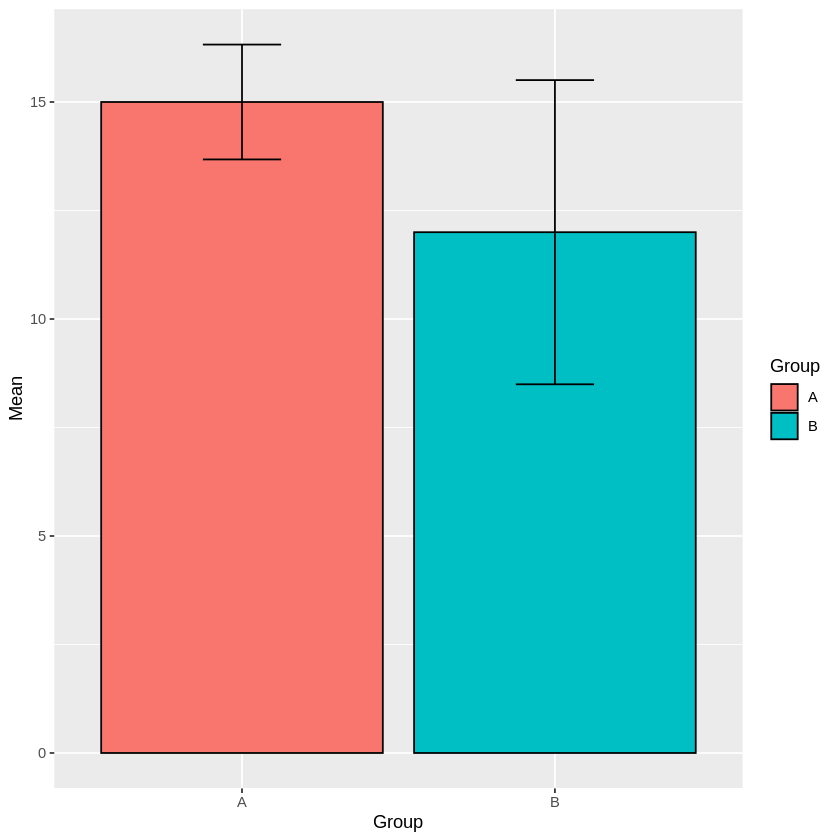

In [11]:
library(ggplot2)

ggplot(plotData, aes(x = Group, y = Mean, fill = Group)) +
    geom_bar(stat = "identity", colour = "black") +
    geom_errorbar(aes(ymin = Mean - MOE, 
                      ymax = Mean + MOE),
                      width = .25
                     )

In [12]:
a <- data.frame(x = Group, y = Mean)

>POTENTIAL iSSUES: The spread are quite different meaning that the homogeneity of variance assumption might be violated.

* to address this issue, use welch's t-test

In [13]:
#create data frame
Data <- data.frame(Group = c("A", "B"),
                   Mean = c(15, 12),
                   MOE = c(1.323745, 3.504519))

In [14]:
M1 <- 15
M2 <- 12
var1 <- 8
var2 <- 24
n1 <- 20
n2 <- 10
alpha <- 0.05


In [15]:
# Perform Welch's t-test
T = (M1 - M2) / sqrt(var1/n1 + var2/n2)
df =  (var1/n1 + var2/n2)^2 / (var1/n1)^2 / (n1 - 1) + (var2/n2)^2 / (var2/n2)^2 / (n2 - 1)


# Question 2:
Responses to stress are governed, in part, by the hypothalamus. Imagine you have two groups of participants. The first shows signs of heart disease and the other does not. You want to determine whether the groups differ (in any direction) in terms of the weight of the hypothalamus.
Use the data “heartDisease.csv” on eClass to determine whether the groups differ based on a classic t-test. Use α=.05
. Use of t.test() is not permitted.
Make sure to report:
- the test statistic
- degrees of freedom
- p-value
- Confidence Interval
- whether your reject or fail to reject the H0



# Question 3:
Compute an appropriate measure of effect size for the previous question. Use of cohen.d() is not permitted.



Question 4:
Repeat question 2, but use a Welch’s t-test. Use of t.test() is not permitted.

Question 5:
Plot the group means with their respective confidence intervals for the heartDisease.csv data.




# Question 6:
Repeat question 2 using 20% Trimmed Means. Do you get a different conclusion? Use of yuen() is not permitted.

# Question 7:
Plot the group trimmed means with their respective confidence intervals for the heartDisease.csv data using 20% trimming.


# Question 8:
Generate Q-Q plots to assess the normality assumption of the heartDisease.csv data. Should a classic t-test be run on this data?


# Question 9:
Generate boxplots to assess the homogeneity of variance assumption of the heartDisease.csv data. Is that assumption reasonable? Make the boxplots pretty colours.